In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.shape

(400, 5)

In [6]:
df.drop(columns=['User ID'] ,inplace=True)

In [7]:
encoder = LabelEncoder()

df['Gender'] = encoder.fit_transform(df["Gender"])

In [8]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


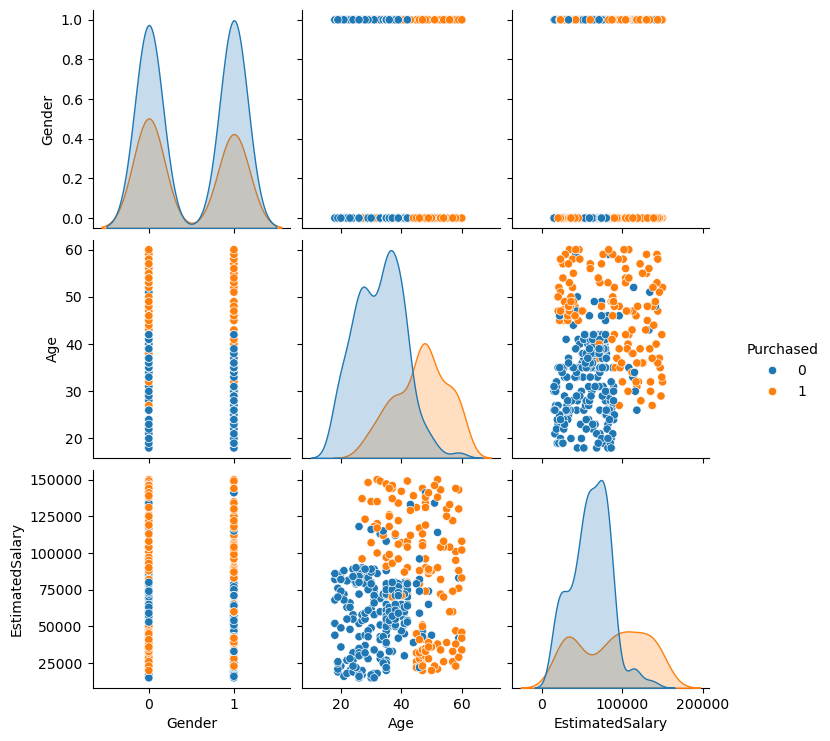

In [9]:
## visualizing data

sns.pairplot(df , hue='Purchased')
plt.show()

<Axes: >

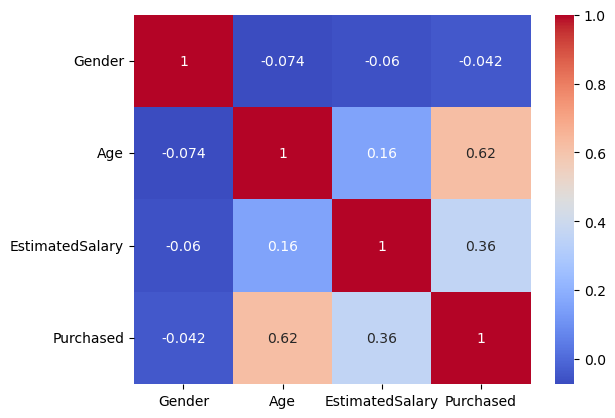

In [10]:
sns.heatmap(df.corr() , cmap='coolwarm' , annot=True)    

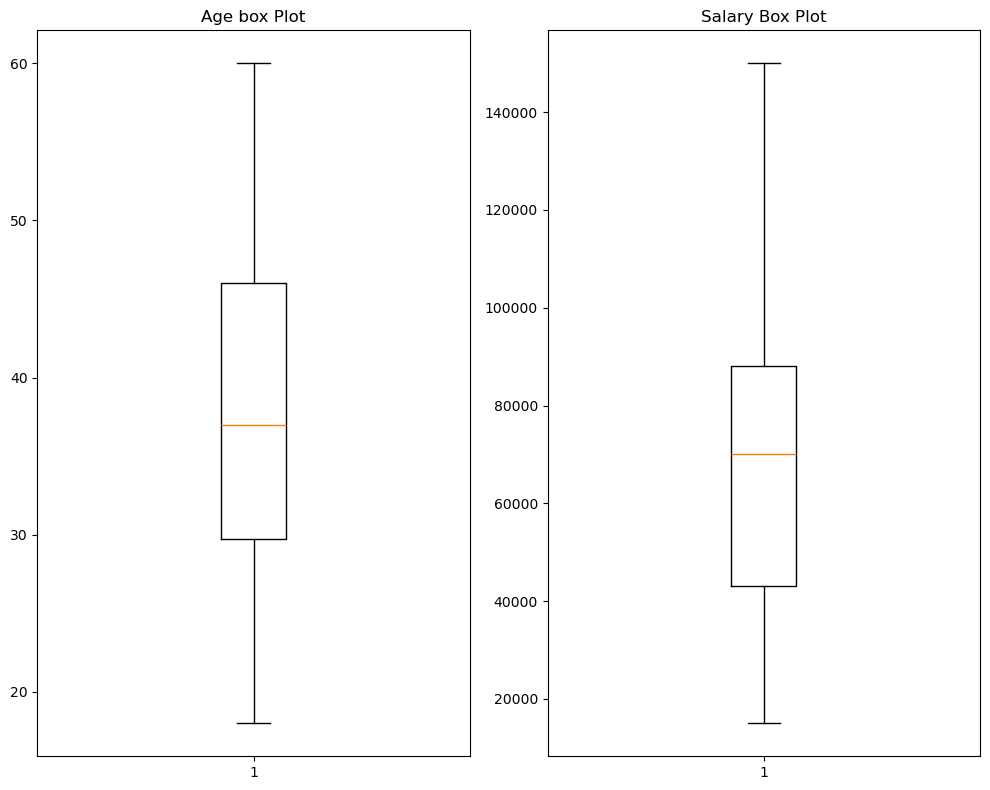

In [11]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.boxplot(df['Age'])
plt.title('Age box Plot')


plt.subplot(1,2,2)
plt.boxplot(df['EstimatedSalary'])
plt.title("Salary Box Plot")


plt.tight_layout()


In [12]:
X = df.drop(columns=['Purchased'])
y = df['Purchased']

In [13]:
X.shape

(400, 3)

In [14]:
# train test split

X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size=0.2 , random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data
X_train = scaler.fit_transform(X_train)

# Transform test data with same scaler
X_test = scaler.transform(X_test)


In [16]:
model = SVC(kernel='linear')
model.fit(X_train , y_train)



SVC(kernel='linear')

In [17]:
y_pred = model.predict(X_test)

In [18]:
print("accuracy Score : " , accuracy_score(y_test , y_pred))


accuracy Score :  0.8625


In [19]:
print("Confusion Matrix : \n" ,confusion_matrix(y_test , y_pred))

Confusion Matrix : 
 [[50  2]
 [ 9 19]]


## Thank you